In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import pyplot as mp

# load csv
city_csv = "data/city_data.csv"
ride_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [2]:
# inspect data
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
city_df.shape

(120, 3)

In [4]:
city_count = len(city_df["city"].unique())
city_count

120

In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
ride_df.shape

(2375, 4)

In [7]:
ride_count = len(ride_df["city"].unique())
ride_count

120

In [8]:
# Combine the data into a single dataset
city_ride_merge = pd.merge(ride_df, city_df)

In [9]:
# inspect the data
city_ride_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [10]:
city_ride_merge.shape

(2375, 6)

In [11]:
city_ride_merge.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

## Bubble Plot of Ride Sharing Data

In [12]:
# Obtain the x and y coordinates for each of the three city types
city_ride_gb = city_ride_merge.groupby(['type'])

urban_df = city_ride_gb.get_group('Urban')
urban_driver_avg = urban_df.groupby('city').agg({'fare' : 'mean', 'ride_id' : 'count'})

suburban_df = city_ride_gb.get_group('Suburban')
suburban_driver_avg = suburban_df.groupby('city').agg({'fare' : 'mean', 'ride_id' : 'count'})

rural_df = city_ride_gb.get_group('Rural')
rural_driver_avg = rural_df.groupby('city').agg({'fare' : 'mean', 'ride_id' : 'count'})

In [13]:
# inspecting data
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [14]:
urban_df.shape

(1625, 6)

In [15]:
urban_df.count()

city            1625
date            1625
fare            1625
ride_id         1625
driver_count    1625
type            1625
dtype: int64

In [16]:
urban_driver_avg.head()

,fare,ride_id
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Carriemouth,28.314444,27
Christopherfurt,24.501852,27
Deanville,25.842632,19


In [17]:
suburban_driver_avg.head()

,fare,ride_id
city,,
Barronchester,36.422500,16
Bethanyland,32.956111,18
Brandonfort,35.437368,19
Colemanland,30.894545,22
Davidfurt,31.995882,17


In [18]:
rural_driver_avg.head()

,fare,ride_id
city,,
Bradshawfurt,40.064000,10
Garzaport,24.123333,3
Harringtonfort,33.470000,6
Jessicaport,36.013333,6
Lake Jamie,34.358333,6


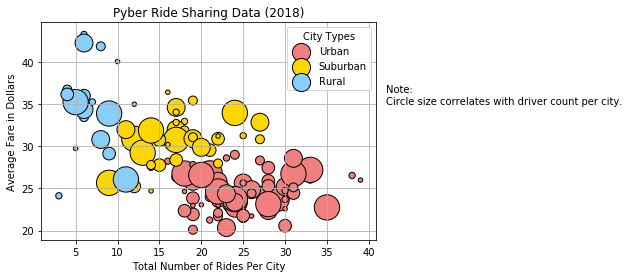

In [19]:
# Build the scatter plots for each city types
s = [20*2**n for n in range(6)]

ax = urban_driver_avg.plot.scatter(x = 'ride_id',
                                   y = 'fare',
                                   c = 'lightcoral',
                                   edgecolors = 'black',
                                   s = s,
                                   label = 'Urban')

suburban_driver_avg.plot.scatter(x = 'ride_id',
                                 y = 'fare',
                                 c = 'gold',
                                 edgecolors = 'black',
                                 s = s,
                                 ax = ax,
                                 label = 'Suburban')

rural_driver_avg.plot.scatter(x = 'ride_id',
                              y = 'fare',
                              c = 'lightskyblue',
                              edgecolors = 'black',
                              s = s,
                              ax = ax,
                              label = 'Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2018)')
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare in Dollars')
plt.grid()

# Create a legend
plt.legend(title = 'City Types')

# Incorporate a text label regarding circle size
t = 'Note: \nCircle size correlates with driver count per city.'
plt.text(42, 35, t)

# Save Figure
mp.savefig('pyber_ride_sharing_data_2018.png')

# Show plot
plt.show()

---
## Total Fares by City Type

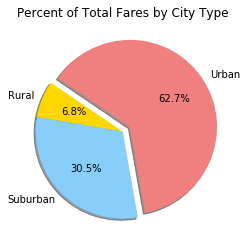

In [20]:
# Calculate Type Percents
urban_df_fare_sum = urban_df['fare'].sum()
suburban_df_fare_sum = suburban_df['fare'].sum()
rural_df_fare_sum = rural_df['fare'].sum()

# Build Pie Chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_df_fare_sum, rural_df_fare_sum,suburban_df_fare_sum]
explode = (0.1, 0.0, 0.0) 
colors = ['lightcoral', 'gold', 'lightskyblue']

# plot settings
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode = explode, 
        labels = labels, 
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True, 
        startangle = 280)
plt.title('Percent of Total Fares by City Type')
ax1.axis('on')

# Save Figure
mp.savefig('percent_total_fares_type.png')

# Show Figure
plt.show()

---
## Total Rides by City Type

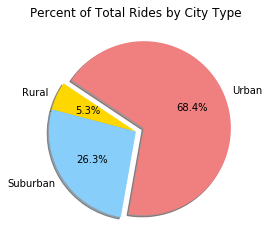

In [21]:
# Calculate Type Percents
total_rides_list = [x[0] for x in [urban_df.shape, rural_df.shape, suburban_df.shape]]

# Build Pie Chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = total_rides_list
explode = (0.1, 0.0, 0.0) 
colors = ['lightcoral', 'gold', 'lightskyblue']

# plot settings
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode = explode, 
        labels = labels, 
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True, 
        startangle = 260)
plt.title('Percent of Total Rides by City Type')
ax1.axis('on')

# Save Figure
mp.savefig('percent_total_rides_type.png')

# Show Figure
plt.show()

---
## Total Drivers by City Type

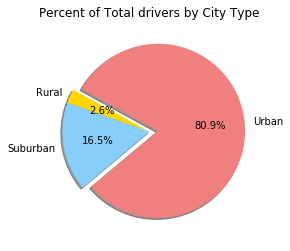

In [22]:
# Calculate Type Percents
urban_df_gb = urban_df.groupby('city')['driver_count'].unique().to_frame()
urban_df_driver_sum = urban_df_gb.sum()

suburban_df_gb = suburban_df.groupby('city')['driver_count'].unique().to_frame()
suburban_df_driver_sum = suburban_df_gb.sum()

rural_df_gb = rural_df.groupby('city')['driver_count'].unique().to_frame()
rural_df_driver_sum = rural_df_gb.sum()

# Build Pie Chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_df_driver_sum, rural_df_driver_sum,suburban_df_driver_sum]
explode = (0.1, 0.0, 0.0) 
colors = ['lightcoral', 'gold', 'lightskyblue']

# plot settings
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode = explode, 
        labels = labels, 
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True, 
        startangle = 220)
plt.title('Percent of Total drivers by City Type')
ax1.axis('on')

# Save Figure
mp.savefig('percent_total_drivers_type.png')

# Show Figure
plt.show()

---

# Observations and Results
* Rural areas have fewer rides and drivers, but riders pay more. Urban areas have more rides and drivers, but riders pay less.

* In rural areas it is likely that the distance between locations is greater which means longer car rides. And urban areas it make sense that since locations are more clustered the car rides will be quicker.

* The suburb is interestingly average.

* With regards to total fares, total rides, and total drivers; urban areas take the lead in all three, followed by suburban areas, then lastly, rural areas.

In [23]:
# to do: tilt